**The Canteen Menu Optimizer**

By Soumyadeep Mondal

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# uploaded = files.upload()
df = pd.read_csv("miniProjectMLdataset.csv")

In [ ]:
# Explore data
print("Dataset Shape:", df.shape)
print(df.head())



Dataset Shape: (111, 73)
            Timestamp     Age  \
0  8/27/2025 11:13:12  Age-21   
1  8/27/2025 13:19:21  Age-19   
2  8/27/2025 13:20:10  Age-20   
3  8/27/2025 13:21:56  Age-22   
4  8/27/2025 13:23:18  Age-21   

  Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n           don't provide like 120.64)  \
0                                                120                                                                                          
1                                                167                                                                                          
2                                                167                                                                                          
3                                                170                                                                                          
4                                             167 cm         

In [ ]:
#Encode categorical variables
le = LabelEncoder()
df['Cuisine_top1'] = le.fit_transform(df['Cuisine_top1'])
df['Dietary Preference'] = le.fit_transform(df['Dietary Preference'])

In [ ]:
# Define features and target
X = df[['Cuisine_top1', 'Spice Tolerance']]
y = df['Dietary Preference']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)# Train-Test Split

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)   #Train Model (Random Forest Classifier)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Predictions
y_pred = model.predict(X_test)
# Decode back to original labels
diet_labels = le.inverse_transform(y_pred)
actual_labels = le.inverse_transform(y_test)

# Show sample predictions
pred_df = pd.DataFrame({
    "Cuisine": X_test['Cuisine_top1'],
    "Spice_Tolerance": X_test['Spice Tolerance'],
    "Actual_Diet": actual_labels,
    "Predicted_Diet": diet_labels
})

display(pred_df.head())

,Cuisine,Spice_Tolerance,Actual_Diet,Predicted_Diet
78,0,4,Non-Veg,Non-Veg
10,5,2,Non-Veg,Non-Veg
4,2,3,Non-Veg,Non-Veg
84,0,4,Non-Veg,Non-Veg
64,2,1,Non-Veg,Non-Veg


from matplotlib import pyplot as plt
_df_0['Cuisine'].plot(kind='hist', bins=20, title='Cuisine')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Spice_Tolerance'].plot(kind='hist', bins=20, title='Spice_Tolerance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Cuisine', y='Spice_Tolerance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Cuisine'].plot(kind='line', figsize=(8, 4), title='Cuisine')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Spice_Tolerance'].plot(kind='line', figsize=(8, 4), title='Spice_Tolerance')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.91      1.00      0.95        20
           4       0.00      0.00      0.00         0

    accuracy                           0.87        23
   macro avg       0.30      0.33      0.32        23
weighted avg       0.79      0.87      0.83        23



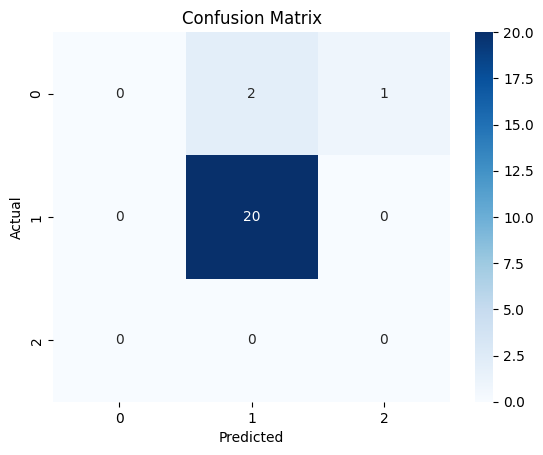

In [ ]:
# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

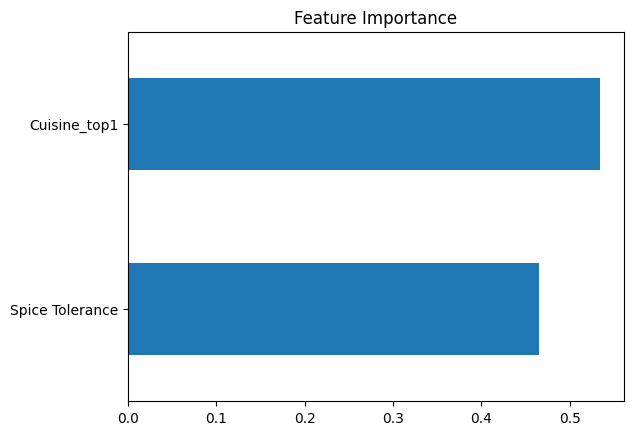

In [ ]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh', title="Feature Importance")
plt.show()